In [1]:
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28,28), cmap='gray')
  plt.title(f'y= {data_sample[1]}')

In [3]:
train_set = dsets.MNIST(root='/.data', train=True, download=True, transform=transforms.ToTensor());
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /.data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
validation_set = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print(validation_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


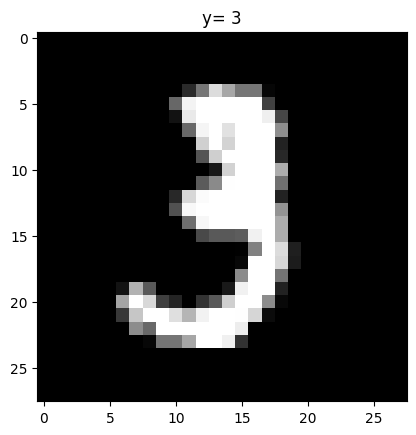

In [5]:
show_data(train_set[10])

In [6]:
class Softmax(nn.Module):
  def __init__(self, input_size, output_size):
    super(Softmax, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self,x):
    return self.linear(x)

In [7]:
train_set[4][0].shape

torch.Size([1, 28, 28])

In [8]:
input_size = 28*28
output_size = 10
model = Softmax(input_size, output_size)

In [9]:
print('weights size: ',list(model.parameters())[0].shape)
print('bias size: : ',list(model.parameters())[1].shape)

weights size:  torch.Size([10, 784])
bias size: :  torch.Size([10])


In [10]:
train_loader = DataLoader(train_set, batch_size = 100)
validation_loader = DataLoader(validation_set, batch_size=5000)

In [11]:
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()

In [12]:
loss_list=[]
accuracy_list=[]
epochs = 12
iterations = [i for i in range(epochs)]
N_cv = len(validation_set)
def training_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      y_hat = model(x.view(-1,28*28))
      loss = criterion(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    correct=0
    for x_cv, y_cv in validation_loader:
      z = model(x_cv.view(-1, 28*28))
      _,y_hat_cv = torch.max(z, 1)
      correct += (y_hat_cv == y_cv).sum().item()
    accuracy = correct / N_cv
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print(f'Epoch: {epoch} ------ Loss: {loss} ------ Accuracy: {accuracy}')


In [13]:
training_model(epochs)

Epoch: 0 ------ Loss: 0.4112580418586731 ------ Accuracy: 0.8930333333333333
Epoch: 1 ------ Loss: 0.36347633600234985 ------ Accuracy: 0.9039333333333334
Epoch: 2 ------ Loss: 0.3441433310508728 ------ Accuracy: 0.90965
Epoch: 3 ------ Loss: 0.3327859044075012 ------ Accuracy: 0.9127333333333333
Epoch: 4 ------ Loss: 0.3248416781425476 ------ Accuracy: 0.9148333333333334
Epoch: 5 ------ Loss: 0.31872016191482544 ------ Accuracy: 0.9164333333333333
Epoch: 6 ------ Loss: 0.31371986865997314 ------ Accuracy: 0.9178
Epoch: 7 ------ Loss: 0.3094799518585205 ------ Accuracy: 0.9186166666666666
Epoch: 8 ------ Loss: 0.3057922422885895 ------ Accuracy: 0.9196
Epoch: 9 ------ Loss: 0.3025255501270294 ------ Accuracy: 0.9203666666666667
Epoch: 10 ------ Loss: 0.2995914816856384 ------ Accuracy: 0.9209833333333334
Epoch: 11 ------ Loss: 0.29692718386650085 ------ Accuracy: 0.9215


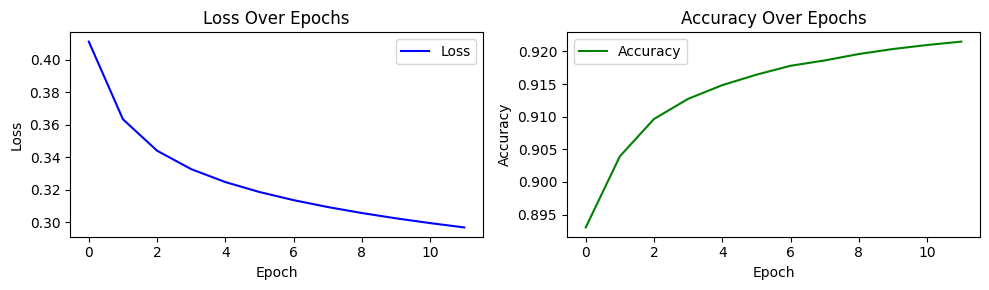

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))


axs[0].plot(iterations, loss_list, label='Loss', color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].legend()

axs[1].plot(iterations, accuracy_list, label='Accuracy', color='green')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].legend()

plt.tight_layout()

plt.show()

In [15]:
SM = nn.Softmax(dim=1)
y_prob = SM(model(train_set[10][0].view(-1, 28*28)))
y_pred, index = torch.max(y_prob, dim=1)
print(f'index={index.item()}, prediction={y_pred.item()}')

index=3, prediction=0.9971656203269958


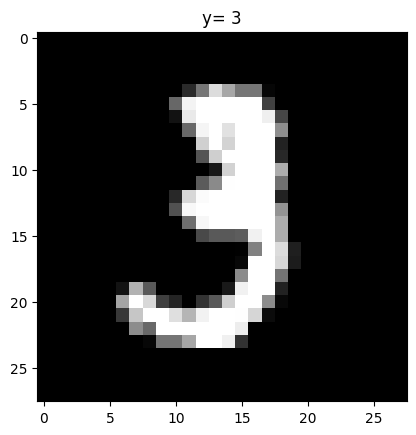

In [16]:
show_data(train_set[10])